# Electric Vehicles charging management using machine learning to save grid and provide Fast Charging.

Comprised of paper work with implementation!

# Pre-processing 🔧

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Data.csv')

In [3]:
df.isnull().sum()# checking for null values

Day       0
Month     0
Hour      0
Minute    0
Class     0
dtype: int64

In [4]:
df

,Day,Month,Hour,Minute,Class
0,1,1,0,0,HIGH
1,1,1,0,10,HIGH
2,1,1,0,20,HIGH
3,1,1,0,30,HIGH
4,1,1,0,40,HIGH
...,...,...,...,...,...
52555,31,12,23,10,HIGH
52556,31,12,23,20,HIGH
52557,31,12,23,30,HIGH
52558,31,12,23,40,HIGH


In [5]:

df['Class'].value_counts()

HIGH      30037
NORMAL    15470
LOW        7053
Name: Class, dtype: int64

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X

,Day,Month,Hour,Minute
0,1,1,0,0
1,1,1,0,10
2,1,1,0,20
3,1,1,0,30
4,1,1,0,40
...,...,...,...,...
52555,31,12,23,10
52556,31,12,23,20
52557,31,12,23,30
52558,31,12,23,40


In [8]:
# geting dummies for the categorical variable. You can use one hot encoding but this is easy😃
df = pd.get_dummies(df)

In [9]:
df

,Day,Month,Hour,Minute,Class_HIGH,Class_LOW,Class_NORMAL
0,1,1,0,0,1,0,0
1,1,1,0,10,1,0,0
2,1,1,0,20,1,0,0
3,1,1,0,30,1,0,0
4,1,1,0,40,1,0,0
...,...,...,...,...,...,...,...
52555,31,12,23,10,1,0,0
52556,31,12,23,20,1,0,0
52557,31,12,23,30,1,0,0
52558,31,12,23,40,1,0,0


# Modeling

In [10]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','F1 Score', 'Precision', 'Recall', 'ROC-AUC Score', 'Accuracy', 'Time for each pred']
model_results = pd.DataFrame(columns = cols)

# ANN

In [10]:
# getiing X and y
X = df.iloc[:, :-3]
y = df.iloc[:, -3:]

In [11]:
y

,Class_HIGH,Class_LOW,Class_NORMAL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
52555,1,0,0
52556,1,0,0
52557,1,0,0
52558,1,0,0


In [12]:
# spliting X, y into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36792, 4), (15768, 4), (36792, 3), (15768, 3))

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras import callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

np.random.seed(0)

In [25]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 64, activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'softmax'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 300, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.8767 - accuracy: 0.5646 - val_loss: 0.7545 - val_accuracy: 0.6169
Epoch 2/300
1150/1150 [==============================] - 1s 987us/step - loss: 0.7422 - accuracy: 0.6265 - val_loss: 0.7181 - val_accuracy: 0.6298
Epoch 3/300
1150/1150 [==============================] - 1s 993us/step - loss: 0.7192 - accuracy: 0.6316 - val_loss: 0.7028 - val_accuracy: 0.6355
Epoch 4/300
1150/1150 [==============================] - 1s 992us/step - loss: 0.7041 - accuracy: 0.6424 - val_loss: 0.6897 - val_accuracy: 0.6561
Epoch 5/300
1150/1150 [==============================] - 1s 994us/step - loss: 0.6921 - accuracy: 0.6515 - val_loss: 0.6783 - val_accuracy: 0.6601
Epoch 6/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.6811 - accuracy: 0.6578 - val_loss: 0.6679 - val_accuracy: 0.6655
Epoch 7/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.6704 - accuracy: 0.6655 - val_loss: 0.6553 

1150/1150 [==============================] - 1s 1ms/step - loss: 0.4671 - accuracy: 0.7955 - val_loss: 0.4321 - val_accuracy: 0.8174
Epoch 58/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy: 0.7974 - val_loss: 0.4307 - val_accuracy: 0.8197
Epoch 59/300
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4658 - accuracy: 0.7977 - val_loss: 0.4315 - val_accuracy: 0.8154
Epoch 60/300
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4647 - accuracy: 0.7994 - val_loss: 0.4297 - val_accuracy: 0.8210
Epoch 61/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4632 - accuracy: 0.8002 - val_loss: 0.4289 - val_accuracy: 0.8197
Epoch 62/300
1150/1150 [==============================] - 1s 957us/step - loss: 0.4610 - accuracy: 0.7987 - val_loss: 0.4276 - val_accuracy: 0.8185
Epoch 63/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4596 - accuracy: 0.8012 - val_loss: 0.4267 - val_accura

Epoch 113/300
1150/1150 [==============================] - 1s 989us/step - loss: 0.4368 - accuracy: 0.8143 - val_loss: 0.4103 - val_accuracy: 0.8231
Epoch 114/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.8141 - val_loss: 0.4102 - val_accuracy: 0.8224
Epoch 115/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4379 - accuracy: 0.8139 - val_loss: 0.4080 - val_accuracy: 0.8246
Epoch 116/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4382 - accuracy: 0.8153 - val_loss: 0.4105 - val_accuracy: 0.8229
Epoch 117/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4352 - accuracy: 0.8169 - val_loss: 0.4085 - val_accuracy: 0.8237
Epoch 118/300
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4353 - accuracy: 0.8178 - val_loss: 0.4082 - val_accuracy: 0.8251
Epoch 119/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4352 - accuracy: 0.8165 - val_loss:

Epoch 224/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4140 - accuracy: 0.8223 - val_loss: 0.3956 - val_accuracy: 0.8255
Epoch 225/300
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8231 - val_loss: 0.3941 - val_accuracy: 0.8264
Epoch 226/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4125 - accuracy: 0.8235 - val_loss: 0.3946 - val_accuracy: 0.8260
Epoch 227/300
1150/1150 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8239 - val_loss: 0.3938 - val_accuracy: 0.8274


In [28]:
results = model.evaluate(X_test, y_test)

493/493 [==============================] - 0s 607us/step - loss: 0.3946 - accuracy: 0.8264


In [29]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.876710,0.564552,0.754523,0.616882
1,0.742211,0.626522,0.718139,0.629756
2,0.719243,0.631550,0.702779,0.635528
3,0.704057,0.642422,0.689722,0.656076
4,0.692081,0.651500,0.678272,0.660071
...,...,...,...,...
222,0.416707,0.822407,0.393949,0.826547
223,0.414049,0.822271,0.395620,0.825469
224,0.414463,0.823114,0.394064,0.826357
225,0.412471,0.823494,0.394562,0.825977


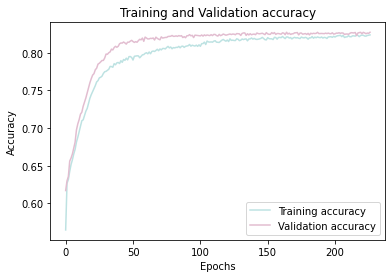

In [30]:
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#e2bdd0", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([[1.0243545e-02, 8.4857047e-01, 1.4118600e-01],
       [8.3499217e-01, 6.1022827e-05, 1.6494682e-01],
       [9.7892708e-01, 7.3038564e-08, 2.1072784e-02],
       ...,
       [6.5883046e-01, 4.6860234e-05, 3.4112260e-01],
       [1.0296363e-02, 4.1161144e-01, 5.7809222e-01],
       [9.9998879e-01, 3.6062404e-22, 1.1264989e-05]], dtype=float32)

In [1]:
#Let's calculate the time taken to made predictions
# %timeit print(model.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [22]:
# Let's check the model for 5 folds cross validation and calculate the accuracy
def baseline_model():     
    #ann = tf.keras.models.Sequential()
    #ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    #ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
    #ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))
    #ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.29% (0.97%)


Awesome! we got an 85 percent😀.

In [11]:
model_results.loc[-1] = ["ANN", np.NaN, np.NaN, np.NaN, np.NaN, .8529, 
                         '30.2 ms ± 2.15 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,ANN,NaN,NaN,NaN,NaN,0.8529,30.2 ms ± 2.15 ms


# K-NN

*_k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It uses a majority vote will classifying the new data. For example, if there are 3 blue dots and 1 dot near the new data point, it will classify it as a blue dot._*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dataset['Class']= label_encoder.fit_transform(dataset['Class'])
 
dataset['Class'].unique()

array([0, 2, 1])

In [4]:
dataset['Class'].value_counts()

0    30037
2    15470
1     7053
Name: Class, dtype: int64

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
print(X_train)

[[ 5 11 16  0]
 [ 2  2 11 20]
 [ 3  2 18 50]
 ...
 [23 10 22 10]
 [30 10 13 10]
 [19  1 23 20]]


In [8]:
y_train

array([2, 2, 1, ..., 0, 2, 0])

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6854   96  483]
 [ 126 1320  340]
 [ 875  387 2659]]


0.8244292237442923

## Hyperparameter Tuning 👷‍♂️

A hyperparameter is a parameter of the model that is set before the start of learning process. Different machine learning models have different hyperparameters. You can find out more about the different hyperparameters of k-NN here.

We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [75]:
grid_params = { 'n_neighbors' : [5,10,15,20,25,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [76]:
gs = GridSearchCV(classifier, grid_params, verbose = 1, cv=3)

Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 6 x 2 x 3 x 3 = 108 times with different hyperparameters.

In [77]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [78]:
# find the best score
g_res.best_score_

0.8314053779807206

In [79]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [80]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=10,
                     weights='distance')

In [81]:
# get a prediction
y_knn = knn.predict(X_test)

In [2]:
#Let's calculate the time taken to made predictions
# %timeit print(knn.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_knn)
print(report)
cm = confusion_matrix(y_test, y_knn)
print(cm)
accuracy = accuracy_score(y_test, y_knn)
print(accuracy)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7433
           1       0.78      0.75      0.76      1786
           2       0.76      0.74      0.75      3921

    accuracy                           0.84     13140
   macro avg       0.81      0.80      0.81     13140
weighted avg       0.84      0.84      0.84     13140

[[6803   70  560]
 [  91 1337  358]
 [ 707  317 2897]]
0.8399543378995433


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_knn, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_knn, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_knn, average='weighted')
print('Precision:', Precision)

f1_score: 0.8389870951630691
Recall: 0.8399543378995433
Precision: 0.8382962984551379


In [109]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9443896484900683


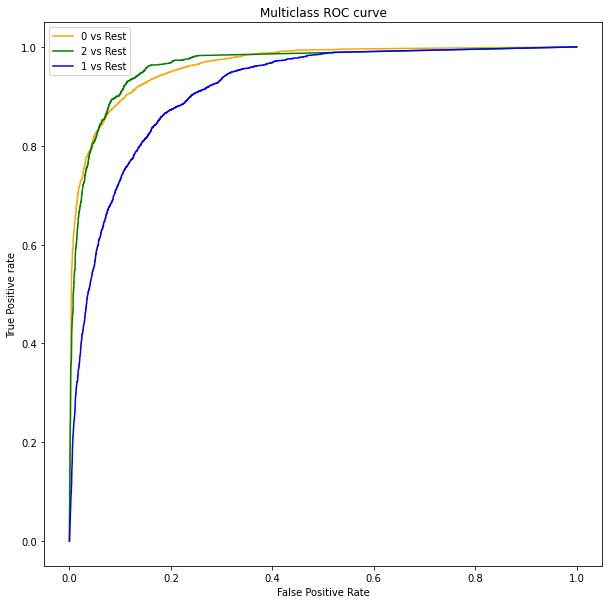

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = knn.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [111]:
model_results.loc[-1] = ["K-NN", f1_score, Precision, Recall, roc_auc_score, accuracy, '1.21 ms ± 46.9 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,K-NN,0.838987,0.838296,0.839954,0.94439,0.839954,1.21 ms ± 46.9 µs


In [12]:
model_results.loc[-1] = ["K-NN", 0.838987, 0.838296, 0.839954, 0.94439, 0.839954, '1.21 ms ± 46.9 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,K-NN,0.838987,0.838296,0.839954,0.94439,0.839954,1.21 ms ± 46.9 µs
1,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5802    0 1631]
 [ 575    0 1211]
 [1512    0 2409]]


0.6248858447488584

We will not be performing hyperparameter tuning here because even after performing that we cannot get the accuracy any close to the models like Decission Tree, SVM, XGBoost, etc.

In [35]:
# get a prediction
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7433
           1       0.00      0.00      0.00      1786
           2       0.46      0.61      0.53      3921

    accuracy                           0.62     13140
   macro avg       0.40      0.46      0.43     13140
weighted avg       0.55      0.62      0.59     13140

[[5802    0 1631]
 [ 575    0 1211]
 [1512    0 2409]]
0.6248858447488584


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.5851602113950214
Recall: 0.6248858447488584
Precision: 0.5529276256843276


In [38]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.7913120531021309


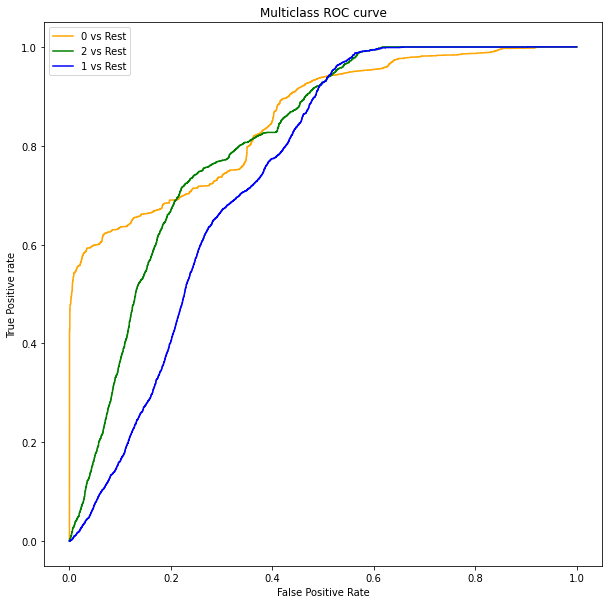

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [3]:
#Let's calculate the time taken to made predictions
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [41]:
model_results.loc[-1] = ["GaussianNB", f1_score, Precision, Recall, roc_auc_score, accuracy, '307 µs ± 11.1 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
1,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [13]:
model_results.loc[-1] = ["GaussianNB", 0.585160, 0.552928, 0.624886, 0.791312, 0.624886, '307 µs ± 11.1 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
1,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
2,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# Kernel SVM

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.5, C=0.1, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.1, gamma=0.5, random_state=0)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6426  161  846]
 [ 293  586  907]
 [ 846  184 2891]]


0.7536529680365297

## Hyperparameter Tuning 👷‍♂️

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same – in this case, like a classifier. We should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

From analysis the above output it is clear that for better result we can use rgb kernel with increasing c (here 0.1, 1, 10, 100, 1000) value keeping the gamma value as 1. So, i will be interupting the kernel and will do tuning based on the predictions i made from above as it is taking a lot of time to run 😕

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [36]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=  34.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.790 total time=  33.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=  34.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  35.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=  34.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.827 total time=  28.2s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.824 total time=  28.5s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.819 total time=  27.7s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  29.6s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  27.2s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.835 total time=  30.9s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid.best_score_

0.8392440385591069

In [38]:
# get the hyperparameters with the best score
grid.best_params_ 

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [95]:
# use the best hyperparameters
classifier = SVC(kernel='rbf', gamma=1, C=1000, random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(C=1000, gamma=1, probability=True, random_state=0)

In [40]:
# get a prediction
%timeit y_classifier = classifier.predict(X_test)

15.4 s ± 482 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
y_classifier = classifier.predict(X_test)

In [4]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy = accuracy_score(y_test, y_classifier)
print(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7433
           1       0.73      0.76      0.74      1786
           2       0.77      0.72      0.74      3921

    accuracy                           0.84     13140
   macro avg       0.80      0.80      0.80     13140
weighted avg       0.83      0.84      0.83     13140

[[6815  114  504]
 [  91 1351  344]
 [ 716  394 2811]]
0.8353881278538813


Jump from 75 to 83 percent after tuning Awesome😀

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_classifier, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_classifier, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_classifier, average='weighted')
print('Precision:', Precision)

f1_score: 0.8342122414006847
Recall: 0.8353881278538813
Precision: 0.8338081303994852


In [114]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9422213255067371


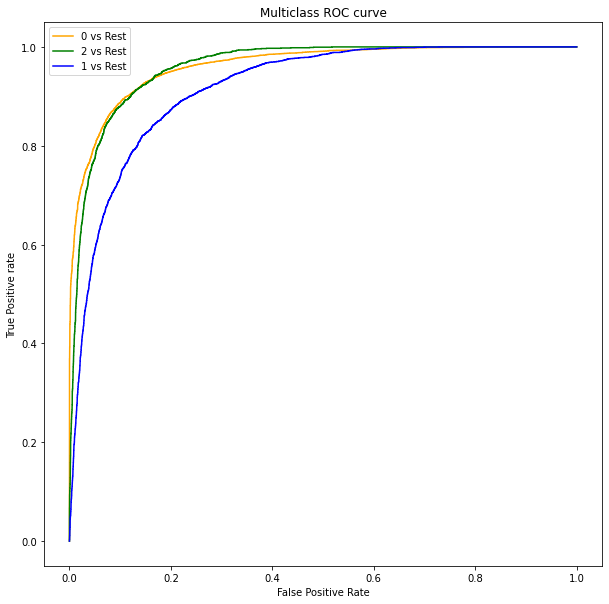

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [116]:
model_results.loc[-1] = ["Kernel SVM", f1_score, Precision, Recall, roc_auc_score, accuracy, '1.47 ms ± 112 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
1,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [14]:
model_results.loc[-1] = ["Kernel SVM", 0.834212, 0.833808, 0.835388, 0.942221, 0.835388, '1.47 ms ± 112 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
1,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
2,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
3,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# Decission Tree Classification

In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [118]:
y_pred = classifier.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7002    3  428]
 [   6 1535  245]
 [ 425  233 3263]]


0.898021308980213

Highest accuracy(89.8%) till now😍. We have to perform hyperparameter tuning here. Let's see if we can increse the accuracy.

## Hyperparameter Tuning 👷‍♂️

We will be using and training model using these parameters- 
criterion, max_depth, min_samples_split, min_samples_leaf

In [40]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,5),
}

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), 
             param_grid = param_dict, cv = 5, verbose = 1, n_jobs=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [43]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [45]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=9)

In [48]:
# use the best hyperparameters
classifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 9, min_samples_leaf= 1, 
                                    min_samples_split= 9, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=9, random_state=0)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_classifier = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy_score(y_test, y_classifier)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7433
           1       0.68      0.68      0.68      1786
           2       0.77      0.70      0.73      3921

    accuracy                           0.82     13140
   macro avg       0.78      0.77      0.77     13140
weighted avg       0.82      0.82      0.82     13140

[[6816  134  483]
 [ 229 1211  346]
 [ 742  425 2754]]


0.8204718417047184

Getting better accuracy without using hyperparameter tuning😐. I will stick with that. You can also try tunning the prameters more.

In [5]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7433
           1       0.87      0.86      0.86      1786
           2       0.83      0.83      0.83      3921

    accuracy                           0.90     13140
   macro avg       0.88      0.88      0.88     13140
weighted avg       0.90      0.90      0.90     13140

[[7002    3  428]
 [   6 1535  245]
 [ 425  233 3263]]
0.898021308980213


In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.8980398534728014
Recall: 0.898021308980213
Precision: 0.8980643771606426


In [122]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9125304156348398


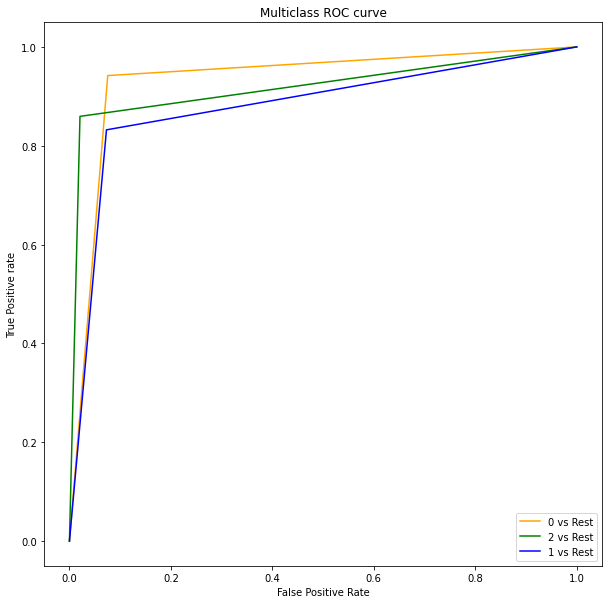

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [126]:
model_results.loc[-1] = ["Decision Tree Classifier", f1_score, Precision, Recall, roc_auc_score, accuracy, '209 µs ± 13.5 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Decission Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
1,Decission Tree Classifier,0.898040,0.898064,0.898021,0.942221,0.898021,209 µs ± 13.5 µs
2,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
3,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [15]:
model_results.loc[-1] = ["Decision Tree Classifier", 0.898040, 0.898064, 0.898021, 0.912530, 0.898021, '209 µs ± 13.5 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
1,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
2,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
3,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
4,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [130]:
y_pred = classifier.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7064   10  359]
 [  28 1533  225]
 [ 515  253 3153]]


0.8942161339421614

## Hyperparameter Tuning 👷‍♂️

We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

I will use RandomizedSearchCV instead of GridSearchCV, we first need to create a parameter grid to sample from during fitting. You can try GridSearchCV too.

In [132]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [133]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  22.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  20.6s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.8s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.6s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  11.7s
[CV] END bootstrap=True, max_depth=90, max_fe

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  19.4s
[CV] END bootstrap=False, max_depth=80, max_f

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  18.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=  34.1s
[CV] END bootstrap=True, max_depth

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [134]:
rf_random.best_score_

0.8930238457635719

In [135]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [136]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=600)

Let's check it using GridSearchCV with the best param of RandomizedSearchCV.

In [147]:
# #Experiment
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [110], #best is 100 so let's take 90 and 110 also
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [600]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 3, verbose = 2)

In [148]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.2s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.1s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [110],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [600]},
             verbose=2)

In [149]:
grid_search.best_score_

0.8923896499238965

In [150]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_grid_search = grid_search.predict(X_test)
# print classification report
print(classification_report(y_test, y_grid_search))
cm = confusion_matrix(y_test, y_grid_search)
print(cm)
accuracy = accuracy_score(y_test, y_grid_search)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7433
           1       0.88      0.85      0.86      1786
           2       0.83      0.83      0.83      3921

    accuracy                           0.90     13140
   macro avg       0.88      0.88      0.88     13140
weighted avg       0.90      0.90      0.90     13140

[[6998   13  422]
 [  17 1524  245]
 [ 457  204 3260]]
0.8966514459665145


Awesome we increase the accuracy by .3 percent😀.

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_grid_search, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_grid_search, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_grid_search, average='weighted')
print('Precision:', Precision)

f1_score: 0.8965480337892503
Recall: 0.8966514459665145
Precision: 0.896490432987822


In [153]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.975160467457991


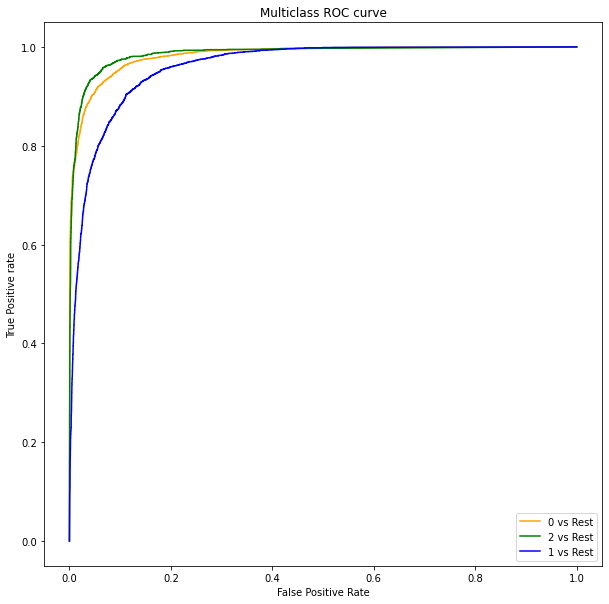

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = grid_search.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [155]:
# %timeit print(grid_search.predict(sc.transform([[31, 12, 23, 30]]))[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
38.9 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
model_results.loc[-1] = ["Random Forest Classifier", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '38.9 ms ± 1.21 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
1,Decission Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
3,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
4,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [16]:
model_results.loc[-1] = ["Random Forest Classifier", 0.896548, 0.896490, 0.896651, 0.975160, 0.896651, 
                         '38.9 ms ± 1.21 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
1,Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
2,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
3,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
4,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
5,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# XGBoost

In [157]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eval_metric = 'merror')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
y_pred = classifier.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7433
           1       0.86      0.84      0.85      1786
           2       0.82      0.82      0.82      3921

    accuracy                           0.89     13140
   macro avg       0.87      0.86      0.87     13140
weighted avg       0.89      0.89      0.89     13140

[[7001   12  420]
 [  12 1494  280]
 [ 486  238 3197]]
0.8898021308980213


## Bayesian Optimization with HYPEROPT 👷‍♂️

- Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.
- HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

- Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

We will be optimizing the cost function along with tuning the model to find the best fit.

In [161]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 1,2),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [162]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [163]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.634703196347032                                      
SCORE:                                                                           
0.634779299847793                                                                
SCORE:                                                                           
0.630593607305936                                                                
SCORE:                                                                           
0.6518264840182648                                                               
SCORE:                                                                            
0.6580669710806697                                                                
SCORE:                                                                            
0.6201674277016743                                                                
SCORE:                                                          

0.6643074581430746                                                                 
SCORE:                                                                             
0.6220700152207002                                                                 
SCORE:                                                                             
0.6446727549467276                                                                 
100%|██████████| 100/100 [04:46<00:00,  2.86s/trial, best loss: -0.6710806697108067]


In [164]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 1.693288744983129, 'gamma': 2.6501275604601435, 'max_depth': 12.0, 'min_child_weight': 2.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6953293209727018}


In [165]:
from xgboost import XGBClassifier

classifier = XGBClassifier(colsample_bytree= 0.9760260201867037, gamma= 1.5037864100035794, max_depth= 17, 
                           min_child_weight= 0.0, reg_alpha= 55.0, reg_lambda= 0.1632984763570468, eval_metric = 'merror')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9760260201867037,
              eval_metric='merror', gamma=1.5037864100035794, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=17,
              min_child_weight=0.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=55.0,
              reg_lambda=0.1632984763570468, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
y_pred = classifier.predict(X_test)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7433
           1       0.74      0.70      0.72      1786
           2       0.75      0.73      0.74      3921

    accuracy                           0.83     13140
   macro avg       0.80      0.78      0.79     13140
weighted avg       0.83      0.83      0.83     13140

[[6848   77  508]
 [ 101 1243  442]
 [ 690  361 2870]]


0.8341704718417047

😐😐😐😐ok.....

**Let's simply try GridSearchCV**

In [168]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

grid_search = GridSearchCV(estimator = XGBClassifier(seed = 20, eval_metric = 'merror'), param_grid = params, cv = 3, verbose = 1)

In [169]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=20,
  

In [176]:
y_grid = grid_search.predict(X_test)

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_grid))
cm = confusion_matrix(y_test, y_grid)
print(cm)
accuracy = accuracy_score(y_test, y_grid)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7433
           1       0.86      0.86      0.86      1786
           2       0.83      0.81      0.82      3921

    accuracy                           0.89     13140
   macro avg       0.87      0.87      0.87     13140
weighted avg       0.89      0.89      0.89     13140

[[7006    5  422]
 [   5 1531  250]
 [ 501  240 3180]]
0.8917047184170472


Better😀‼‼

In [175]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_grid, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_grid, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_grid, average='weighted')
print('Precision:', Precision)

f1_score: 0.8913616873748883
Recall: 0.8917047184170472
Precision: 0.8910886198493597


roc_auc_score 0.9728493572553847


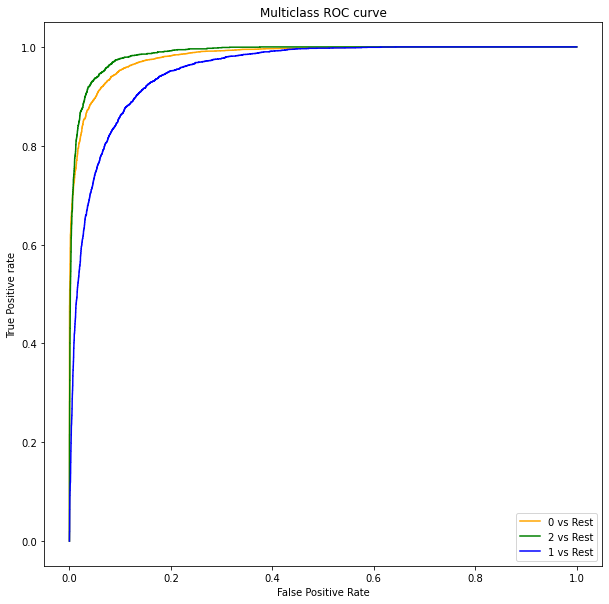

In [177]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = grid_search.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [6]:
# %timeit print(grid_search.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [179]:
model_results.loc[-1] = ["XGBoost", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '5.25 ms ± 144 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.25 ms ± 144 µs
1,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
2,Decission Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
4,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
5,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [17]:
model_results.loc[-1] = ["XGBoost", 0.891362, 0.891089, 0.891705, 0.972849, 0.891705, 
                         '5.25 ms ± 144 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.25 ms ± 144 µs
1,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
2,Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
3,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
4,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
5,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
6,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


# CatBoost

In [180]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.095434
0:	learn: 1.0116466	total: 15.4ms	remaining: 15.4s
1:	learn: 0.9407682	total: 25.8ms	remaining: 12.9s
2:	learn: 0.8842236	total: 35.3ms	remaining: 11.7s
3:	learn: 0.8367285	total: 45.5ms	remaining: 11.3s
4:	learn: 0.7974537	total: 55.4ms	remaining: 11s
5:	learn: 0.7640474	total: 65.7ms	remaining: 10.9s
6:	learn: 0.7345456	total: 75.1ms	remaining: 10.6s
7:	learn: 0.7072482	total: 84.7ms	remaining: 10.5s
8:	learn: 0.6864100	total: 94.4ms	remaining: 10.4s
9:	learn: 0.6662347	total: 104ms	remaining: 10.3s
10:	learn: 0.6506111	total: 113ms	remaining: 10.2s
11:	learn: 0.6348348	total: 123ms	remaining: 10.1s
12:	learn: 0.6202711	total: 133ms	remaining: 10.1s
13:	learn: 0.6042252	total: 143ms	remaining: 10s
14:	learn: 0.5930944	total: 152ms	remaining: 9.99s
15:	learn: 0.5798320	total: 162ms	remaining: 9.96s
16:	learn: 0.5690671	total: 171ms	remaining: 9.9s
17:	learn: 0.5592319	total: 184ms	remaining: 10s
18:	learn: 0.5519292	total: 195ms	remaining: 10.1s
19:	learn

173:	learn: 0.3557092	total: 1.99s	remaining: 9.46s
174:	learn: 0.3554485	total: 2s	remaining: 9.45s
175:	learn: 0.3549564	total: 2.02s	remaining: 9.44s
176:	learn: 0.3544162	total: 2.03s	remaining: 9.45s
177:	learn: 0.3538683	total: 2.04s	remaining: 9.45s
178:	learn: 0.3530036	total: 2.06s	remaining: 9.45s
179:	learn: 0.3527951	total: 2.08s	remaining: 9.46s
180:	learn: 0.3523328	total: 2.09s	remaining: 9.46s
181:	learn: 0.3519585	total: 2.1s	remaining: 9.46s
182:	learn: 0.3512931	total: 2.12s	remaining: 9.46s
183:	learn: 0.3510755	total: 2.13s	remaining: 9.46s
184:	learn: 0.3508138	total: 2.14s	remaining: 9.44s
185:	learn: 0.3506366	total: 2.16s	remaining: 9.44s
186:	learn: 0.3504662	total: 2.17s	remaining: 9.44s
187:	learn: 0.3501246	total: 2.18s	remaining: 9.43s
188:	learn: 0.3498207	total: 2.2s	remaining: 9.43s
189:	learn: 0.3493936	total: 2.21s	remaining: 9.43s
190:	learn: 0.3490031	total: 2.22s	remaining: 9.42s
191:	learn: 0.3488275	total: 2.24s	remaining: 9.42s
192:	learn: 0.348

339:	learn: 0.3099966	total: 3.8s	remaining: 7.37s
340:	learn: 0.3099213	total: 3.81s	remaining: 7.36s
341:	learn: 0.3096967	total: 3.82s	remaining: 7.35s
342:	learn: 0.3094658	total: 3.83s	remaining: 7.33s
343:	learn: 0.3093335	total: 3.84s	remaining: 7.32s
344:	learn: 0.3092418	total: 3.85s	remaining: 7.31s
345:	learn: 0.3090831	total: 3.86s	remaining: 7.29s
346:	learn: 0.3087351	total: 3.87s	remaining: 7.28s
347:	learn: 0.3085870	total: 3.88s	remaining: 7.27s
348:	learn: 0.3084271	total: 3.89s	remaining: 7.25s
349:	learn: 0.3082420	total: 3.9s	remaining: 7.24s
350:	learn: 0.3081111	total: 3.91s	remaining: 7.22s
351:	learn: 0.3079775	total: 3.92s	remaining: 7.21s
352:	learn: 0.3077846	total: 3.92s	remaining: 7.19s
353:	learn: 0.3074404	total: 3.93s	remaining: 7.18s
354:	learn: 0.3071895	total: 3.94s	remaining: 7.16s
355:	learn: 0.3070457	total: 3.95s	remaining: 7.15s
356:	learn: 0.3068343	total: 3.96s	remaining: 7.14s
357:	learn: 0.3065022	total: 3.97s	remaining: 7.13s
358:	learn: 0.

501:	learn: 0.2844785	total: 5.42s	remaining: 5.38s
502:	learn: 0.2844250	total: 5.44s	remaining: 5.37s
503:	learn: 0.2842491	total: 5.45s	remaining: 5.36s
504:	learn: 0.2840389	total: 5.46s	remaining: 5.35s
505:	learn: 0.2839444	total: 5.47s	remaining: 5.34s
506:	learn: 0.2837941	total: 5.48s	remaining: 5.33s
507:	learn: 0.2836523	total: 5.49s	remaining: 5.31s
508:	learn: 0.2835936	total: 5.5s	remaining: 5.3s
509:	learn: 0.2835077	total: 5.51s	remaining: 5.29s
510:	learn: 0.2832912	total: 5.52s	remaining: 5.28s
511:	learn: 0.2831100	total: 5.53s	remaining: 5.27s
512:	learn: 0.2829846	total: 5.54s	remaining: 5.25s
513:	learn: 0.2828537	total: 5.54s	remaining: 5.24s
514:	learn: 0.2828031	total: 5.55s	remaining: 5.23s
515:	learn: 0.2826900	total: 5.56s	remaining: 5.22s
516:	learn: 0.2826249	total: 5.57s	remaining: 5.21s
517:	learn: 0.2824865	total: 5.58s	remaining: 5.19s
518:	learn: 0.2823186	total: 5.59s	remaining: 5.18s
519:	learn: 0.2821094	total: 5.6s	remaining: 5.17s
520:	learn: 0.2

666:	learn: 0.2663900	total: 7.04s	remaining: 3.52s
667:	learn: 0.2663282	total: 7.05s	remaining: 3.51s
668:	learn: 0.2662317	total: 7.07s	remaining: 3.5s
669:	learn: 0.2661561	total: 7.08s	remaining: 3.49s
670:	learn: 0.2660965	total: 7.09s	remaining: 3.48s
671:	learn: 0.2660411	total: 7.1s	remaining: 3.46s
672:	learn: 0.2659674	total: 7.11s	remaining: 3.45s
673:	learn: 0.2658430	total: 7.12s	remaining: 3.44s
674:	learn: 0.2658198	total: 7.12s	remaining: 3.43s
675:	learn: 0.2656864	total: 7.13s	remaining: 3.42s
676:	learn: 0.2655919	total: 7.14s	remaining: 3.41s
677:	learn: 0.2654163	total: 7.15s	remaining: 3.4s
678:	learn: 0.2653042	total: 7.16s	remaining: 3.39s
679:	learn: 0.2652228	total: 7.17s	remaining: 3.38s
680:	learn: 0.2651327	total: 7.18s	remaining: 3.36s
681:	learn: 0.2650092	total: 7.19s	remaining: 3.35s
682:	learn: 0.2648307	total: 7.2s	remaining: 3.34s
683:	learn: 0.2647220	total: 7.21s	remaining: 3.33s
684:	learn: 0.2646115	total: 7.22s	remaining: 3.32s
685:	learn: 0.26

831:	learn: 0.2541301	total: 8.68s	remaining: 1.75s
832:	learn: 0.2540535	total: 8.69s	remaining: 1.74s
833:	learn: 0.2539517	total: 8.7s	remaining: 1.73s
834:	learn: 0.2538990	total: 8.71s	remaining: 1.72s
835:	learn: 0.2537712	total: 8.72s	remaining: 1.71s
836:	learn: 0.2536151	total: 8.73s	remaining: 1.7s
837:	learn: 0.2535707	total: 8.74s	remaining: 1.69s
838:	learn: 0.2535078	total: 8.75s	remaining: 1.68s
839:	learn: 0.2533782	total: 8.76s	remaining: 1.67s
840:	learn: 0.2533028	total: 8.77s	remaining: 1.66s
841:	learn: 0.2532610	total: 8.78s	remaining: 1.65s
842:	learn: 0.2532184	total: 8.79s	remaining: 1.64s
843:	learn: 0.2531792	total: 8.8s	remaining: 1.63s
844:	learn: 0.2531099	total: 8.81s	remaining: 1.61s
845:	learn: 0.2530550	total: 8.82s	remaining: 1.6s
846:	learn: 0.2529947	total: 8.83s	remaining: 1.59s
847:	learn: 0.2529563	total: 8.84s	remaining: 1.58s
848:	learn: 0.2529222	total: 8.85s	remaining: 1.57s
849:	learn: 0.2528609	total: 8.86s	remaining: 1.56s
850:	learn: 0.25

990:	learn: 0.2445622	total: 10.3s	remaining: 93.5ms
991:	learn: 0.2445292	total: 10.3s	remaining: 83.2ms
992:	learn: 0.2444682	total: 10.3s	remaining: 72.8ms
993:	learn: 0.2444208	total: 10.3s	remaining: 62.4ms
994:	learn: 0.2443652	total: 10.3s	remaining: 52ms
995:	learn: 0.2443100	total: 10.4s	remaining: 41.6ms
996:	learn: 0.2442781	total: 10.4s	remaining: 31.2ms
997:	learn: 0.2442295	total: 10.4s	remaining: 20.8ms
998:	learn: 0.2441575	total: 10.4s	remaining: 10.4ms
999:	learn: 0.2441338	total: 10.4s	remaining: 0us


In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7433
           1       0.85      0.85      0.85      1786
           2       0.82      0.81      0.81      3921

    accuracy                           0.89     13140
   macro avg       0.87      0.86      0.87     13140
weighted avg       0.89      0.89      0.89     13140

[[6986   11  436]
 [  17 1515  254]
 [ 501  262 3158]]
0.8872907153729072


In [185]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.8869573250198771
Recall: 0.8872907153729072
Precision: 0.886690758880562


roc_auc_score 0.9711936881004043


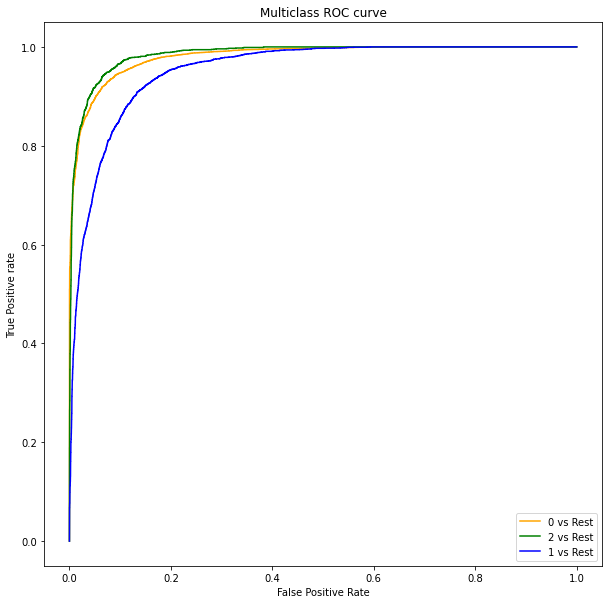

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [7]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [188]:
model_results.loc[-1] = ["CatBoost", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '1.36 ms ± 120 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.36 ms ± 120 µs
1,XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.25 ms ± 144 µs
2,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
3,Decission Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
5,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
6,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs


In [18]:
model_results.loc[-1] = ["CatBoost", 0.886957, 0.886691, 0.887291, 0.971194, 0.887291, 
                         '1.36 ms ± 120 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
0,CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.36 ms ± 120 µs
1,XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.25 ms ± 144 µs
2,Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
3,Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
4,Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
5,GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
6,K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
7,ANN,NaN,NaN,NaN,NaN,0.852900,30.2 ms ± 2.15 ms


In [19]:
model_results.to_csv('Results.csv')

## Visualizing the final comparison dataframe

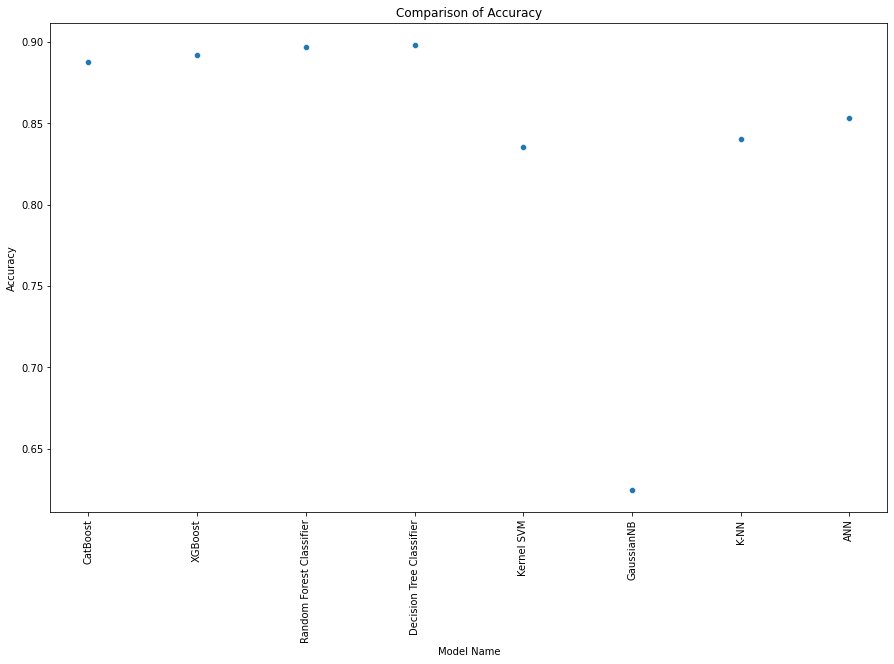

In [21]:
import seaborn as sns 
plt.figure(figsize=(15,9))
sns.scatterplot(data=model_results, x='Model Name', y='Accuracy')
plt.xticks(rotation=90)
plt.title('Comparison of Accuracy')
plt.show()

In [20]:
model_results = model_results.set_index('Model Name')

In [21]:
model_results1 = model_results.copy()

In [24]:
model_results1

,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time for each pred
Model Name,,,,,,
CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.36 ms ± 120 µs
XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.25 ms ± 144 µs
Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.9 ms ± 1.21 ms
Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,209 µs ± 13.5 µs
Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.47 ms ± 112 µs
GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,307 µs ± 11.1 µs
K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.21 ms ± 46.9 µs
ANN,0.833038,0.828195,0.839128,0.929951,0.852900,30.2 ms ± 2.15 ms


In [25]:
model_results1.drop('Time for each pred', axis=1, inplace = True)

In [26]:
# Excluding the +- time for 'time for each pred' and taking only the actual time to visualise
time = [1.36, 5.25, 38.9, .209, 1.47, .307, 1.21, 30.2]
model_results1['Time per pred in ms'] = time

In [27]:
model_results1

,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time per pred in ms
Model Name,,,,,,
CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.360
XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.250
Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.900
Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,0.209
Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.470
GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,0.307
K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.210
ANN,0.833038,0.828195,0.839128,0.929951,0.852900,30.200


In [28]:
def style_negative(v, props=''):
    return props if v > .85 else None
s2 = model_results1.style.applymap(style_negative, props='color:red;').applymap(lambda v: 'opacity: 50%;' if (v < 0.7) else None)

In [29]:
s2

,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time per pred in ms
Model Name,,,,,,
CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.360000
XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.250000
Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.900000
Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,0.209000
Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.470000
GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,0.307000
K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.210000
ANN,0.833038,0.828195,0.839128,0.929951,0.852900,30.200000


In [30]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,F1 Score,Precision,Recall,ROC-AUC Score,Accuracy,Time per pred in ms
Model Name,,,,,,
CatBoost,0.886957,0.886691,0.887291,0.971194,0.887291,1.360000
XGBoost,0.891362,0.891089,0.891705,0.972849,0.891705,5.250000
Random Forest Classifier,0.896548,0.896490,0.896651,0.975160,0.896651,38.900000
Decision Tree Classifier,0.898040,0.898064,0.898021,0.912530,0.898021,0.209000
Kernel SVM,0.834212,0.833808,0.835388,0.942221,0.835388,1.470000
GaussianNB,0.585160,0.552928,0.624886,0.791312,0.624886,0.307000
K-NN,0.838987,0.838296,0.839954,0.944390,0.839954,1.210000
ANN,0.833038,0.828195,0.839128,0.929951,0.852900,30.200000


# Conclusion 
- **Decission Tree Classifier, Random Rorest Classifier has given the best result acc of 90percent approx. even after performing crossvalidation. So, we will be using Decission Tree Classifier for further deployment.**

# Time Series analysis

Here we will be using a different dataset as an example because of the non avalability of data which will tell us the power over a period of time. We can say that if we have a Global_active_power higher that 4.5 the class is high and likewise.. 

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

# Let's import packages required to perform LSTM
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
#Lets have a look
df.head() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.tail() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [7]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [8]:
df.shape

(2075259, 7)

In [9]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [10]:
# filling nan with mean in any columns

for j in range(0,7):        
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [11]:
# Final check to make sure that there are not more nan values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

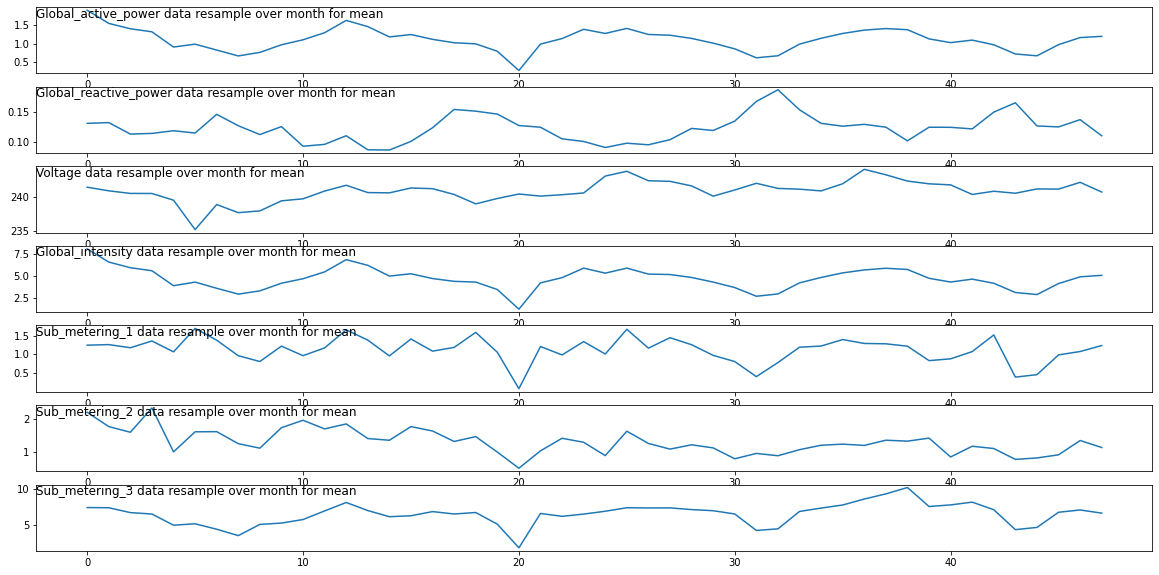

In [12]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

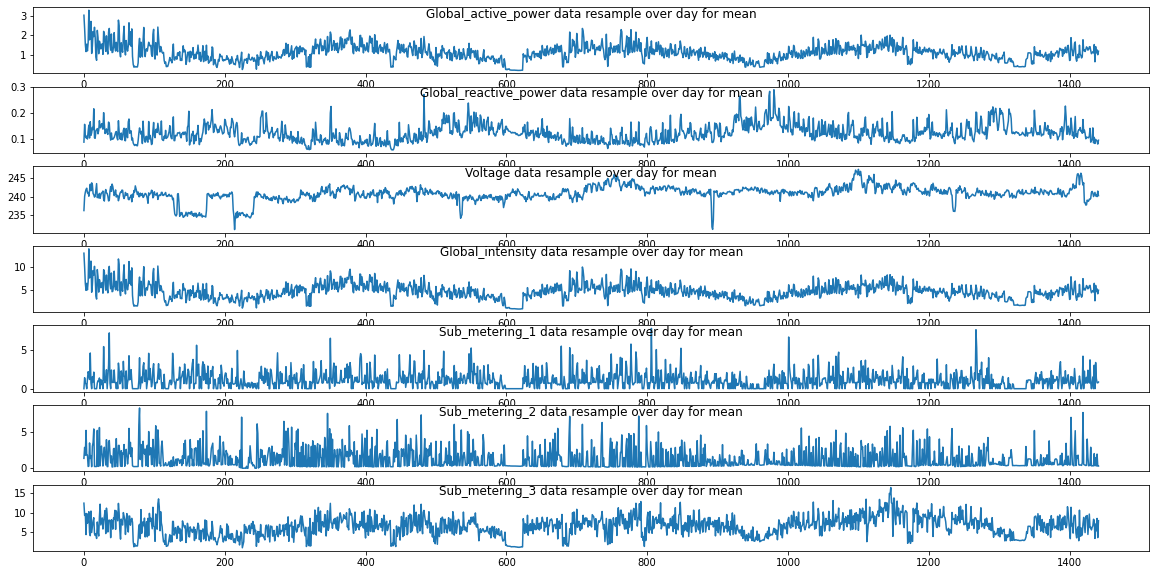

In [13]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

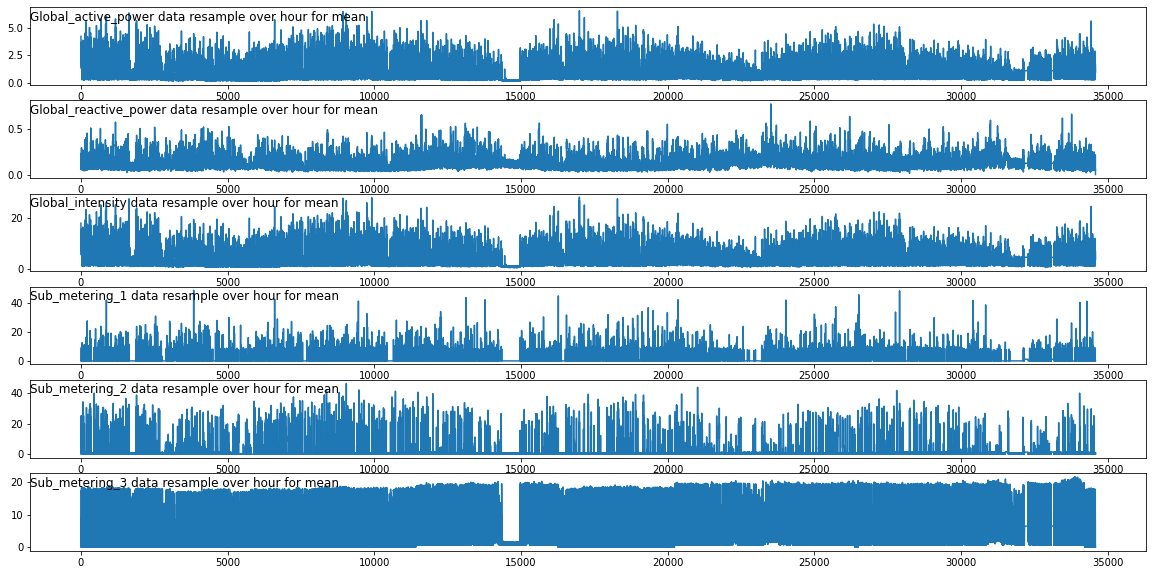

In [14]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

## LSTM Data Preparation and fitting

The LSTM nueral network has been selected because:

    it is best suited for large data,
    time-series, and
    sequential problem.

In the first step, I will fram the problem to predict the Global_active_power.


In [15]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [17]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [19]:
df_resample['Global_active_power'].value_counts().sum()

34589

In [22]:
df_resample[df_resample['Global_active_power'] <= 1].value_counts().sum()

19075

So, we will have 7 input series variables and the 1 output variable for 'Global_active_power' at the current time in hour.

We also splitting the data into: train and validation sets. I select 4000 data over 34,589 dat to train, the rest will be used to test the model.


In [17]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 4000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [18]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Epoch 1/50
58/58 - 2s - loss: 0.0261 - val_loss: 0.0104
Epoch 2/50
58/58 - 0s - loss: 0.0149 - val_loss: 0.0100
Epoch 3/50
58/58 - 0s - loss: 0.0139 - val_loss: 0.0099
Epoch 4/50
58/58 - 0s - loss: 0.0133 - val_loss: 0.0097
Epoch 5/50
58/58 - 0s - loss: 0.0128 - val_loss: 0.0095
Epoch 6/50
58/58 - 0s - loss: 0.0125 - val_loss: 0.0094
Epoch 7/50
58/58 - 0s - loss: 0.0122 - val_loss: 0.0094
Epoch 8/50
58/58 - 0s - loss: 0.0121 - val_loss: 0.0093
Epoch 9/50
58/58 - 0s - loss: 0.0119 - val_loss: 0.0093
Epoch 10/50
58/58 - 0s - loss: 0.0119 - val_loss: 0.0092
Epoch 11/50
58/58 - 0s - loss: 0.0118 - val_loss: 0.0092
Epoch 12/50
58/58 - 0s - loss: 0.0118 - val_loss: 0.0092
Epoch 13/50
58/58 - 0s - loss: 0.0118 - val_loss: 0.0092
Epoch 14/50
58/58 - 0s - loss: 0.0117 - val_loss: 0.0091
Epoch 15/50
58/58 - 0s - loss: 0.0117 - val_loss: 0.0091
Epoch 16/50
58/58 - 0s - loss: 0.0117 - val_loss: 0.0091
Epoch 17/50
58/58 - 0s - loss: 0.0117 - val_loss: 0.0091
Epoch 18/50
58/58 - 0s - loss: 0.0117 - 

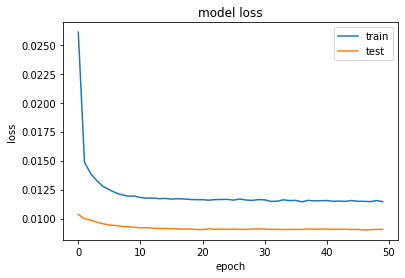

In [20]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

In [22]:
# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [23]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [24]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.613


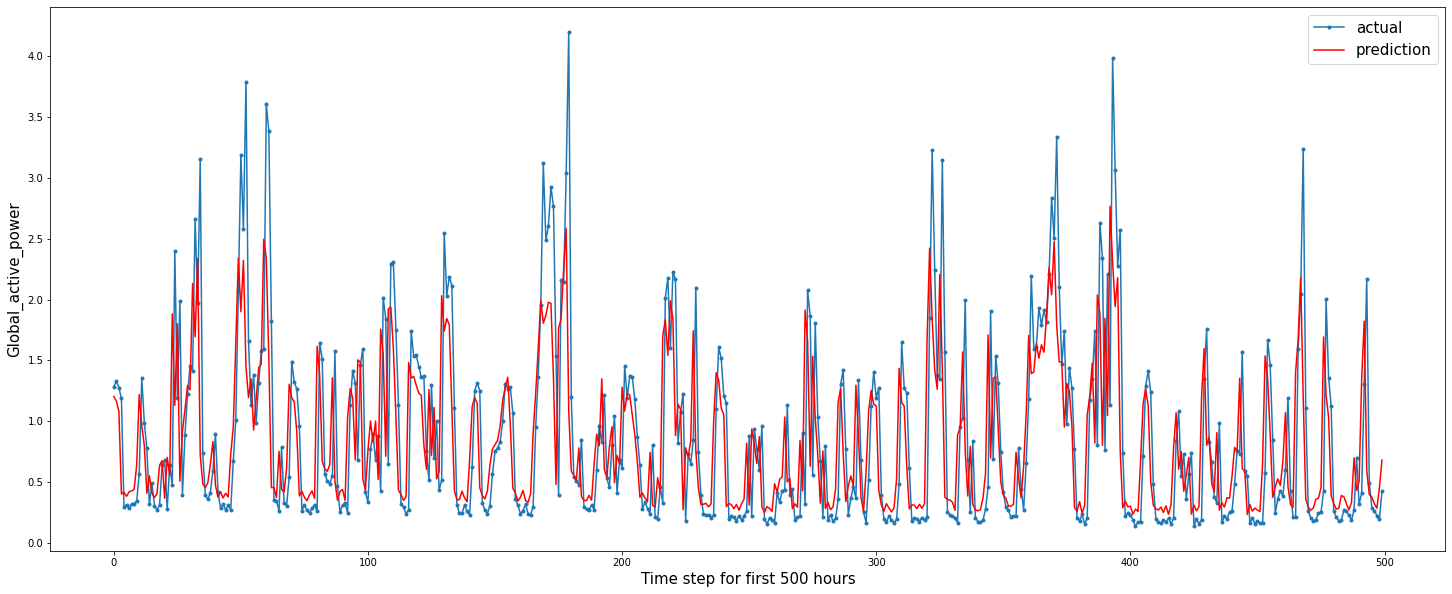

In [25]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [26]:
inv_yhat[1]

1.1658354388475418

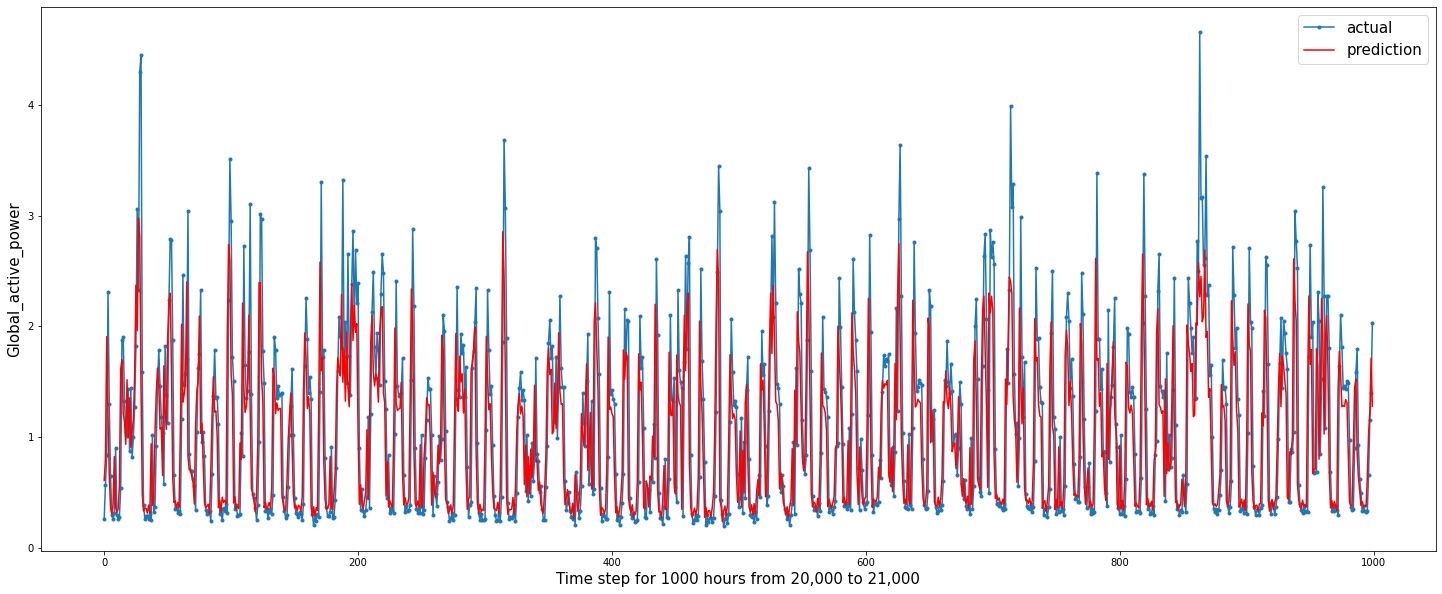

In [27]:
aa=[x for x in range(1000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[20000:21000], marker='.', label="actual")
plt.plot(aa, inv_yhat[20000:21000], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 20,000 to 21,000', size=15)
plt.legend(fontsize=15)
plt.show()

LSTM was successfully performed with good result.